In [1]:
!pip install tmdbsimple

In [2]:
# Using API Credentials
import json
with open('/Users/rdrlr/.secret/tmdb_api.json', 'r') as f:
    login = json.load(f)
## Display the keys of the loaded dict
login.keys()


dict_keys(['api-key'])

In [3]:
# After installing tmdbsimple above, import the package 
# and set the API_KEY variable to the "API Key(v3 auth)" entry from your Settings page
import tmdbsimple as tmdb
tmdb.API_KEY =  login['api-key']

In [4]:
# create a movie object using the .Movies function from tmdb
# Next, you can use the MovieID with the tmdb.Movies() function to create a movie instance. 
# This is just an example that arbitrarily uses the movie with the ID of 603 (The Matrix)
movie = tmdb.Movies(603)
movie

In [5]:
# The data for the movie can be extracted as a dictionary by running the info() method on the movie object.
# movie objects have a .info dictionary 
# we are looking for the 3 budget, revenue, cerification (P, PG, etc)
# once it runs find these 3 items and take a look at them to get an idea what what we are working with
info = movie.info()
info

{'adult': False,
 'backdrop_path': '/giBJ0ezYNEobFBfB8H4JNTjmll.jpg',
 'belongs_to_collection': {'id': 2344,
  'name': 'The Matrix Collection',
  'poster_path': '/bV9qTVHTVf0gkW0j7p7M0ILD4pG.jpg',
  'backdrop_path': '/bRm2DEgUiYciDw3myHuYFInD7la.jpg'},
 'budget': 63000000,
 'genres': [{'id': 28, 'name': 'Action'},
  {'id': 878, 'name': 'Science Fiction'}],
 'homepage': 'http://www.warnerbros.com/matrix',
 'id': 603,
 'imdb_id': 'tt0133093',
 'original_language': 'en',
 'original_title': 'The Matrix',
 'overview': 'Set in the 22nd century, The Matrix tells the story of a computer hacker who joins a group of underground insurgents fighting the vast and powerful computers who now rule the earth.',
 'popularity': 89.884,
 'poster_path': '/f89U3ADr1oiB1s9GkdPOEpXUk5H.jpg',
 'production_companies': [{'id': 79,
   'logo_path': '/at4uYdwAAgNRKhZuuFX8ShKSybw.png',
   'name': 'Village Roadshow Pictures',
   'origin_country': 'US'},
  {'id': 372,
   'logo_path': None,
   'name': 'Groucho II Film 

In [6]:
# since we are only asked to find 3 pieice of info for each movie in the instructions
# we will use info to check only budget, revenue, cerification (P, PG, etc) as requested
info['budget']

63000000

In [7]:
info['revenue']

463517383

In [8]:
# this will be movie id that we will use later
# Notice that the .info() includes "imbdb_id," 
# which we can use to match with our existing data frame of movies! 
#You will recognize the "tt" numbers from IMDb.
info['imdb_id']

'tt0133093'

    - Try searching by the IMDb number. For example, what was the budget of Tom and Jerry withc had IMDb id of ttl361336

In [9]:
# specify any movie id on top in this case it was Tom and jerry
# ['budget'] of this particual id wil give us the budget for this movie id for tom and jerry
# Searching by IMDB_ID will allow us to make API calls for the specific movies we have already 
# filtered out from the IMDB database in the first part of our project!
movie = tmdb.Movies('tt1361336')
info = movie.info()
info['budget']

50000000

## Saving the Movie Certification/MPAA Rating

While MOST of the data we are interested in is stored in the .info(), the certification rating is not.

The README for the package's repository shows how to obtain this information:

In [10]:
# certification information must be found by connecting to a movie then you will see the certification
# # source = https://github.com/celiao/tmdbsimple
# it lets us know to look up releases
# this filter by iso_3166_1 which is only us movies 
# This code below will print the rating of the movie if it is in the US. 
# (Recall that one specification for this project was that all of our movies are US movies, 
#  but this is more generalizable for future projects where that may not be the case).

releases = movie.releases()
for c in releases['countries']:
    if c['iso_3166_1'] == 'US':
        print(c['certification'])

PG
PG
PG


In [11]:
releases 

{'id': 587807,
 'countries': [{'certification': 'PG',
   'descriptors': [],
   'iso_3166_1': 'US',
   'primary': False,
   'release_date': '2021-02-26'},
  {'certification': '',
   'descriptors': [],
   'iso_3166_1': 'CO',
   'primary': False,
   'release_date': '2021-02-12'},
  {'certification': 'PG',
   'descriptors': [],
   'iso_3166_1': 'US',
   'primary': False,
   'release_date': '2021-02-26'},
  {'certification': 'ALL',
   'descriptors': [],
   'iso_3166_1': 'KR',
   'primary': False,
   'release_date': '2021-02-24'},
  {'certification': '',
   'descriptors': [],
   'iso_3166_1': 'ID',
   'primary': False,
   'release_date': '2021-03-10'},
  {'certification': '6',
   'descriptors': [],
   'iso_3166_1': 'NL',
   'primary': False,
   'release_date': '2021-06-09'},
  {'certification': 'G',
   'descriptors': [],
   'iso_3166_1': 'IE',
   'primary': False,
   'release_date': '2021-05-07'},
  {'certification': 'M/6',
   'descriptors': [],
   'iso_3166_1': 'PT',
   'primary': False,
  

    - Instead of printing the certification separately, we want to add that to our dictionary results for movie.info().

In [12]:
# Get the movie object for the current id
# Instead of printing the certification separately, we want to add that to our dictionary results for movie.info().
# this will create extra columns of us movies 
# we got this info from last few queries
# this will store the 
movie = tmdb.Movies('tt1361336')
# save the .info .releases dictionaries
info = movie.info()
releases = movie.releases()
# Loop through countries in releases
for c in releases['countries']:
    # if the country abbreviation==US
    if c['iso_3166_1' ] =='US':
        ## save a "certification" key in the info dict with the certification
       info['certification'] = c['certification']

In [13]:
def get_movie_with_rating(movie_id):
    """Adapted from sourcd = https://github.com/celiao/tmdbsimple"""
   # Get the movie object for the current id
    movie = tmdb.Movies(movie_id)
    
    # save the .info .releases dictionaries
    info = movie.info()
    releases = movie.releases()
    
    # Loop through countries in releases
    for c in releases['countries']:
        # if the country abbreviation==US
        if c['iso_3166_1' ] =='US':
            ## save a "certification" key in the info dict with the certification
           info['certification'] = c['certification']
    return info

In [14]:
# testing the avengers id workgs tt0848228
test = get_movie_with_rating("tt0848228") #put your function name here
test

{'adult': False,
 'backdrop_path': '/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg',
 'belongs_to_collection': {'id': 86311,
  'name': 'The Avengers Collection',
  'poster_path': '/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg',
  'backdrop_path': '/zuW6fOiusv4X9nnW3paHGfXcSll.jpg'},
 'budget': 220000000,
 'genres': [{'id': 878, 'name': 'Science Fiction'},
  {'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'}],
 'homepage': 'https://www.marvel.com/movies/the-avengers',
 'id': 24428,
 'imdb_id': 'tt0848228',
 'original_language': 'en',
 'original_title': 'The Avengers',
 'overview': 'When an unexpected enemy emerges and threatens global safety and security, Nick Fury, director of the international peacekeeping agency known as S.H.I.E.L.D., finds himself in need of a team to pull the world back from the brink of disaster. Spanning the globe, a daring recruitment effort begins!',
 'popularity': 127.885,
 'poster_path': '/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg',
 'production_companies': [{'id': 420,
   'logo_path

In [15]:
# testing with the movie the notebook id tt0332280
test = get_movie_with_rating("tt0332280") #put your function name here
test

{'adult': False,
 'backdrop_path': '/qom1SZSENdmHFNZBXbtJAU0WTlC.jpg',
 'belongs_to_collection': None,
 'budget': 29000000,
 'genres': [{'id': 10749, 'name': 'Romance'}, {'id': 18, 'name': 'Drama'}],
 'homepage': 'http://www.newline.com/properties/notebookthe.html',
 'id': 11036,
 'imdb_id': 'tt0332280',
 'original_language': 'en',
 'original_title': 'The Notebook',
 'overview': "An epic love story centered around an older man who reads aloud to a woman with Alzheimer's. From a faded notebook, the old man's words bring to life the story about a couple who is separated by World War II, and is then passionately reunited, seven years later, after they have taken different paths.",
 'popularity': 64.082,
 'poster_path': '/rNzQyW4f8B8cQeg7Dgj3n6eT5k9.jpg',
 'production_companies': [{'id': 12,
   'logo_path': '/iaYpEp3LQmb8AfAtmTvpqd4149c.png',
   'name': 'New Line Cinema',
   'origin_country': 'US'},
  {'id': 1565, 'logo_path': None, 'name': 'Avery Pix', 'origin_country': 'US'},
  {'id': 26

___

In [16]:
# Import packages
import os, time, json
import tmdbsimple as tmdb 
import pandas as pd
from tqdm.notebook import tqdm_notebook
# Create the folder for saving files (if it doesn't exist)
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['.ipynb_checkpoints',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'IMDB Movie Dataset Info.docx',
 'title-akas-us-only.csv',
 'title.basics.tsv.gz',
 'title.ratings.tsv.gz',
 'Title_Basics.csv',
 'Title_ratings.csv',
 'tmdb_api.json',
 'tmdb_api_results_2001.json',
 'tmdb_api_results_2002.json']

In [17]:
YEARS_TO_GET = [2001,2002]

In [18]:
# Load in the dataframe from project part 1 as basics:
basics = pd.read_csv('Data/Title_Basics.csv')
basics.head()


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70,Drama
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama
3,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi"
4,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002.0,NaN,126,Drama


Now we have defined the "movie_ids_to_get". It includes the ids from our dataframe in the year we are seeking, and it excludes any that we have already made calls for.

We will use this list for our loop of API calls.

In [19]:
def write_json(new_data, filename): 
    """Adapted from: https://www.geeksforgeeks.org/append-to-json-file-using-python/"""  
    
    with open(filename,'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        ## Choose extend or append
        if (type(new_data) == list) & (type(file_data) == list):
            file_data.extend(new_data)
        else:
             file_data.append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file)

In [20]:
# Start of Outer loop
for YEAR in tqdm_notebook(YEARS_TO_GET,desc='YEARS',position=0):
    # Define the JSON file to store results for the year
    JSON_FILE = f'{FOLDER}tmdb_api_results_{YEAR}.json'
    # Check if the JSON file exists
    file_exists = os.path.isfile(JSON_FILE)
     
    # If it does not exist: create it
    if file_exists == False:
    # save an empty dict with just "imdb_id" to the new json file.
        with open(JSON_FILE,'w') as f:
            json.dump([{'imdb_id':0}],f)

    # Filtering for movies from selected startYear
    df = basics.loc[ basics['startYear']==YEAR].copy()

    # saving movie ids to list
    movie_ids = df['tconst'].copy()#.to_list
    movie_ids

    # Load existing data from json into a dataframe called "previous_df"
    previous_df = pd.read_json(JSON_FILE)
    previous_df

    # filter out any ids that are already in the JSON_FILE
    movie_ids_to_get = movie_ids[~movie_ids.isin(previous_df['imdb_id'])]

    # Get index and movie id from list
    # INNER LOOP

    for movie_id in tqdm_notebook(movie_ids_to_get, 
                                desc=f'Movies from {YEAR}',
                                position=1,
                                leave=True):
        # Attempt to retrieve then data for the movie id
        try:
            temp = get_movie_with_rating(movie_id)  #This uses your pre-ma    de function
            # Append/extend results to existing file using a pre-made function
            write_json(temp,JSON_FILE)
            # Short 20 ms sleep to prevent overwhelming server
            time.sleep(0.02)
    
        # If it fails,  make a dict with just the id and None for certification.
        except Exception as e:
            continue

    # Save the final results to a csv.gz file
    final_year_df = pd.read_json(JSON_FILE)
    final_year_df.to_csv(f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz", compression="gzip", index=False)

YEARS:   0%|          | 0/2 [00:00<?, ?it/s]

Movies from 2001:   0%|          | 0/217 [00:00<?, ?it/s]

Movies from 2002:   0%|          | 0/277 [00:00<?, ?it/s]

In [21]:
import glob
# Use glob to get all filepaths that match the pattern (*=wildcard)
tmdb_files = sorted(glob.glob("Data/final_tmdb_data*.csv.gz"))
tmdb_files


['Data\\final_tmdb_data_2001.csv.gz', 'Data\\final_tmdb_data_2002.csv.gz']

In [22]:
# Use read_csv in a list comprehension and combine with concat to load all files
df = pd.concat([pd.read_csv(f) for f in tmdb_files] )
df


,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/tJLV3BAlHOgscVOrA99Wnb2gAef.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.326,1245.0,PG-13
2,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.000,3.0,NaN
3,tt0116916,0.0,/rFpHBidSlhjflmnLu7BZilyKeQR.jpg,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,73549.0,en,The Dark Mist,...,0.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,The Dark Mist,0.0,3.500,2.0,PG
4,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.400,132.0,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,tt6449044,0.0,/a9pkw8stijESGx1flSGPqcXLkHu.jpg,"{'id': 957260, 'name': 'The Conman Collection'...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,314105.0,cn,賭俠2002,...,0.0,97.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,NaN,The Conman 2002,0.0,4.300,3.0,NaN
1292,tt6694126,0.0,/sXjVpTZyDvwzPVZve3AmyCUBeHk.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,819174.0,fa,عروس خوش‌قدم,...,0.0,101.0,"[{'english_name': 'Persian', 'iso_639_1': 'fa'...",Released,NaN,The Lucky Bride,0.0,8.000,1.0,NaN
1293,tt8302928,0.0,NaN,NaN,0.0,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,866533.0,el,Movie Toons: Treasure Island,...,0.0,0.0,[],Released,NaN,Movie Toons: Treasure Island,0.0,0.000,0.0,NaN
1294,tt8474326,0.0,NaN,NaN,0.0,[],NaN,292027.0,en,Skin Eating Jungle Vampires,...,0.0,0.0,[],Released,NaN,Skin Eating Jungle Vampires,0.0,0.000,0.0,NaN


# EDA

In [23]:
# Load the data from your .csv.gz file into a new DataFrame.
#df = pd.read_csv(csv_fname)
#df.info()
#df.head()

## How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [24]:
filter_budget = df['budget'] >0
filter_budget.sum()

617

In [25]:
filter_revenue = df['revenue'] >0
filter_revenue.sum()

524

In [26]:
filter_financial = filter_revenue & filter_budget
filter_financial.sum()

412

In [27]:
# Remove any movies with 0's for budget AND revenue from the remaining visualizations.
df = df[filter_financial]
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0035423,0.0,/tJLV3BAlHOgscVOrA99Wnb2gAef.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.326,1245.0,PG-13
4,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.400,132.0,PG-13
9,tt0120681,0.0,/xo2S7gRwCvWdVqM0Swv37yA2rzw.jpg,NaN,35000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,768.0,en,From Hell,...,74558115.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Only the legend will survive.,From Hell,0.0,6.685,2611.0,R
10,tt0120737,0.0,/x2RS3uTcsJJ9IfjNPcgDmukoEcQ.jpg,"{'id': 119, 'name': 'The Lord of the Rings Col...",93000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net/,120.0,en,The Lord of the Rings: The Fellowship of the Ring,...,871368364.0,179.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,One ring to rule them all,The Lord of the Rings: The Fellowship of the Ring,0.0,8.406,23644.0,PG-13
12,tt0120824,0.0,/gnyGSoVKOIz1BR34lIBuuTq0Znl.jpg,NaN,38000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.miramax.com/movie/the-shipping-news,6440.0,en,The Shipping News,...,24690441.0,111.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,You'll never guess what you'll find inside...,The Shipping News,0.0,6.321,344.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,tt0364385,0.0,/3ZDkl8rsoLe6g4FRV9alNH5sZOt.jpg,"{'id': 1972, 'name': 'Ju-on Collection', 'post...",3500000.0,"[{'id': 27, 'name': 'Horror'}]",NaN,11838.0,ja,呪怨,...,3657876.0,92.0,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,When a grudge from the dead passes to the livi...,Ju-on: The Grudge,0.0,6.700,714.0,R
1138,tt0365960,0.0,/ahXtNFVHtFxvjphZN8QlHRVsu9W.jpg,NaN,20000.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,27090.0,en,Zero Day,...,8466.0,92.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,"In high school, you're told you can do anythin...",Zero Day,0.0,7.400,79.0,NR
1225,tt0757920,0.0,/sOkmFOVcDmH2P4GU9Mvyc4ZBC3D.jpg,NaN,10000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,44078.0,fa,Dokhtar-e shirini-foroosh,...,10000.0,105.0,"[{'english_name': 'Persian', 'iso_639_1': 'fa'...",Released,NaN,The Pastry Girl,0.0,1.000,1.0,NaN
1241,tt1039983,0.0,/7B5IQdNNyNsSwBaW9zzCT9XmAcJ.jpg,NaN,500000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,69419.0,ta,ரெட்,...,500000.0,157.0,"[{'english_name': 'Tamil', 'iso_639_1': 'ta', ...",Released,NaN,Red,0.0,5.100,7.0,NaN


In [28]:
print(f"There are {len(df)} movies with valid budget/revenue.")

There are 412 movies with valid budget/revenue.


## How many movies are there in each of the certification categories (G/PG/PG-13/R)?

R        137
PG-13    122
NaN      105
PG        31
G         11
NR         6
Name: certification, dtype: int64

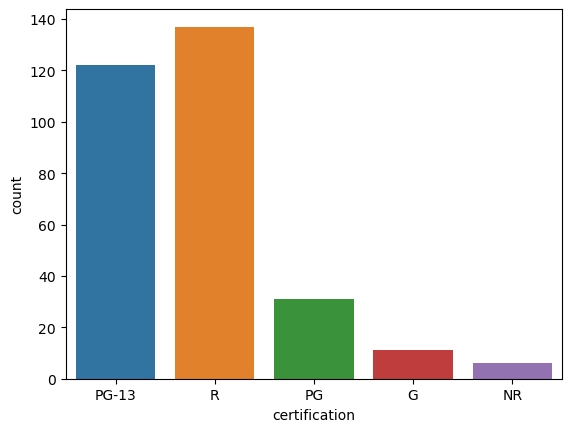

In [29]:
import seaborn as sns
sns.countplot(data=df, x='certification');
df['certification'].value_counts(dropna=False)

## What is the average revenue per certification category?

certification
G       $ 140,116,409
NR        $ 4,809,200
PG      $ 197,808,684
PG-13   $ 109,231,217
R        $ 44,102,031
Name: revenue, dtype: float64

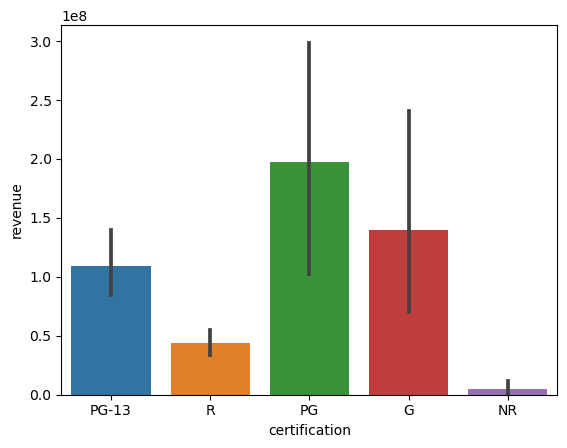

In [30]:
with pd.option_context('display.float_format',lambda x: f"$ {x:,.0f}"):
    display(df.groupby('certification')['revenue'].mean())

sns.barplot(data=df, x='certification', y='revenue');

## What is the average budget per certification category?

certification
G       $ 47,818,182
NR       $ 3,803,333
PG      $ 54,325,717
PG-13   $ 44,384,248
R       $ 26,776,278
Name: budget, dtype: float64

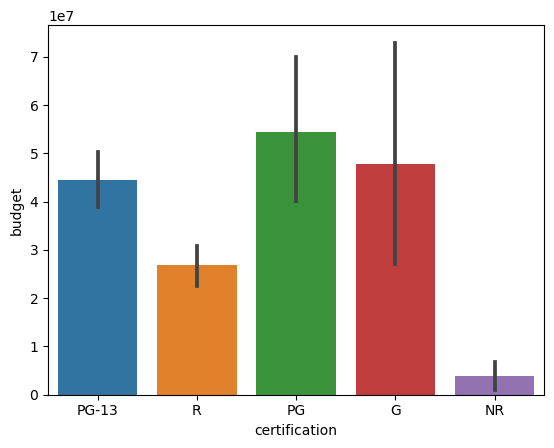

In [31]:
with pd.option_context('display.float_format',lambda x: f"$ {x:,.0f}"):
    display(df.groupby('certification')['budget'].mean())

sns.barplot(data=df, x='certification', y='budget');

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412 entries, 1 to 1262
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                412 non-null    object 
 1   adult                  412 non-null    float64
 2   backdrop_path          402 non-null    object 
 3   belongs_to_collection  95 non-null     object 
 4   budget                 412 non-null    float64
 5   genres                 412 non-null    object 
 6   homepage               81 non-null     object 
 7   id                     412 non-null    float64
 8   original_language      412 non-null    object 
 9   original_title         412 non-null    object 
 10  overview               412 non-null    object 
 11  popularity             412 non-null    float64
 12  poster_path            411 non-null    object 
 13  production_companies   412 non-null    object 
 14  production_countries   412 non-null    object 
 15  relea